In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

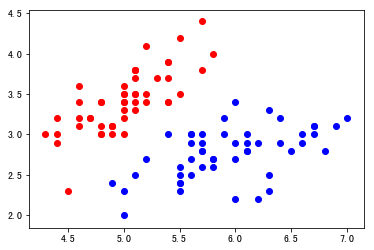

In [2]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

standardscaler=StandardScaler()
standardscaler.fit(X)
X_standard=standardscaler.transform(X)


In [6]:
from sklearn.svm import LinearSVC
svc=LinearSVC(C=1e9)
svc.fit(X_standard,y)
#传入特别大的C代表正则化项趋近于0，是hard margin SVM，极其严格，容错率低

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


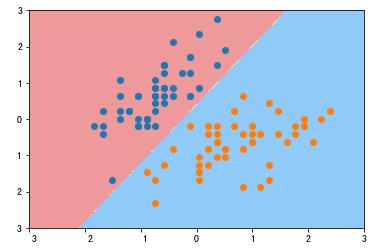

In [7]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [8]:
svc2=LinearSVC(C=0.01)
svc2.fit(X_standard,y)

#传入C很小，有一定的容错率

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


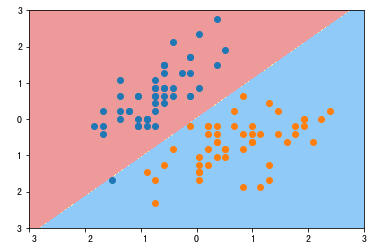

In [9]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [12]:
svc.coef_
#有两个特征的

array([ 4.0324144 , -2.49294421])

In [14]:
svc.intercept_

array([0.95368051])

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


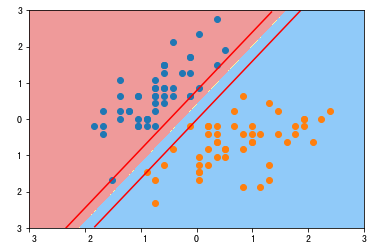

In [18]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    #可以将支撑向量在的线画出来
    w=model.coef_[0]   
    b=model.intercept_[0]
    #决策边界：w0*x0+w1*x1+b=0
    #y轴为x1,x1=-b/w1-x0*w0/w1
    plot_x=np.linspace(axis[0],axis[1],200)   #x为原x轴区间最小值与最大值之间200个数
    #up线：w*x+b=1
    #down线：w*x+b=-1
    up_y=-b/w[1]-w[0]/w[1]*plot_x+1/w[1]
    down_y=-b/w[1]-w[0]/w[1]*plot_x-1/w[1]
    
    #防止计算出的up_y/down_y超出原y轴范围要做取舍数据
    up_index=(up_y>=axis[2])&(up_y<=axis[3])
    down_index=(down_y>=axis[2])&(down_y<=axis[3])
    plt.plot(plot_x[up_index],up_y[up_index],color='r')
    plt.plot(plot_x[down_index],down_y[down_index],color='r')
    
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


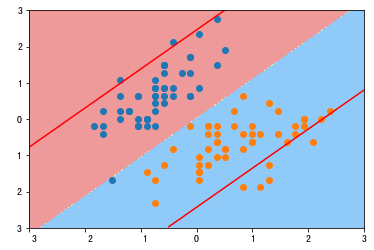

In [19]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

# 05SVM使用多项式特征

In [20]:
from sklearn import datasets
X,y=datasets.make_moons()

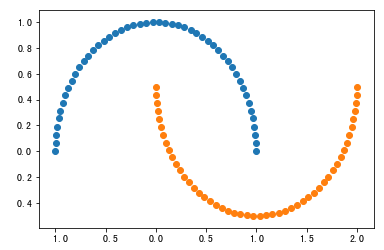

In [24]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

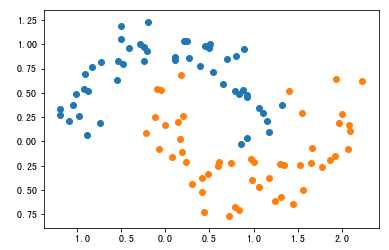

In [25]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree,C=1.0):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('linearSVC',LinearSVC(C=C))
    ])
poly_svc=PolynomialSVC(degree=3)
poly_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


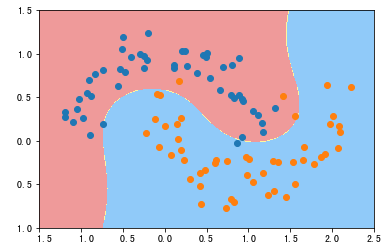

In [28]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 使用多项式核函数的SVM

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


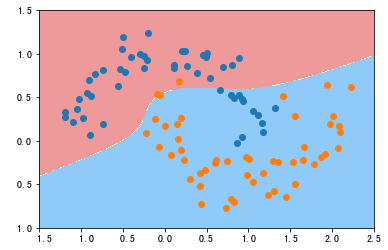

In [31]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree,C=1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('kernelSVC',SVC(degree=degree,C=C,kernel='poly'))
    ])
poly_kernel_svc=PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X,y)
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()


# 07高斯核函数

### 高斯核函数将每一个样本点映射到无穷维空间

In [35]:
x=np.arange(-4,5,1)
y=np.array((x>=-2)&(x<=2),dtype='int')
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

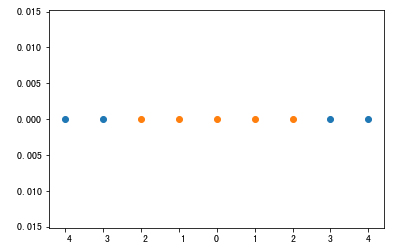

In [36]:
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))
plt.show()

In [37]:
def gaussian(x,l):
    gamma=1.0
    return np.exp(-gamma*(x-l)**2)

In [41]:
l1,l2=-1,1
X_new=np.empty((len(x),2))
for i,data in enumerate(x):
    X_new[i,0]=gaussian(data,l1)
    X_new[i,1]=gaussian(data,l2)
X_new

array([[1.23409804e-04, 1.38879439e-11],
       [1.83156389e-02, 1.12535175e-07],
       [3.67879441e-01, 1.23409804e-04],
       [1.00000000e+00, 1.83156389e-02],
       [3.67879441e-01, 3.67879441e-01],
       [1.83156389e-02, 1.00000000e+00],
       [1.23409804e-04, 3.67879441e-01],
       [1.12535175e-07, 1.83156389e-02],
       [1.38879439e-11, 1.23409804e-04]])

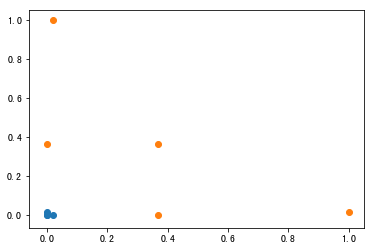

In [42]:
plt.scatter(X_new[y==0,0], X_new[y==0,1])
plt.scatter(X_new[y==1,0], X_new[y==1,1])
plt.show()
#将原本线性不可分（如图1）的数据进过高斯核函数转换为二维线性可分的数据

# 08sklearn中高斯核（RBF）函数

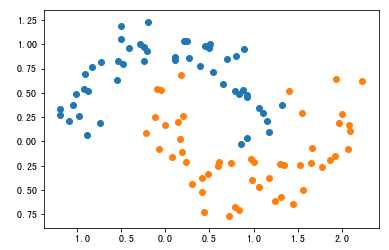

In [43]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [45]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFkernelSVC(gamma):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('SVC',SVC(kernel='rbf',gamma=gamma))
    ])
svc=RBFkernelSVC(gamma=1)
svc.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


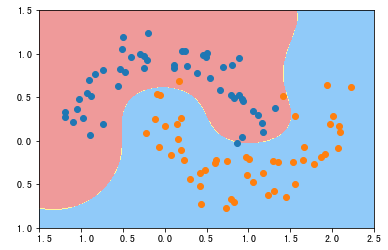

In [46]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


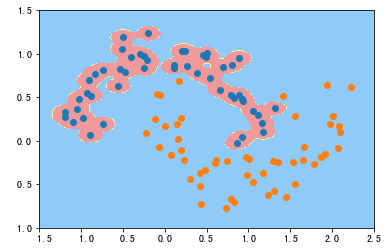

In [48]:
svc_gamma100 = RBFkernelSVC(gamma=100)
svc_gamma100.fit(X, y)
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()
#gamma与正态分布函数（高斯函数）作用类似
#过拟合

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


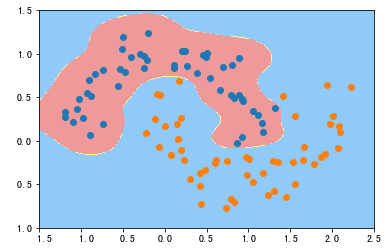

In [49]:
svc_gamma10 = RBFkernelSVC(gamma=10)
svc_gamma10.fit(X, y)
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/jacquelin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


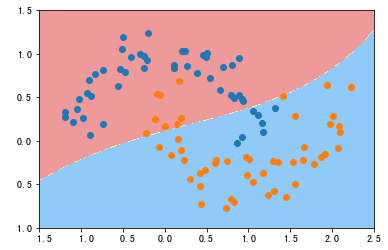

In [50]:
svc_gamma01 = RBFkernelSVC(gamma=0.1)
svc_gamma01.fit(X, y)
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()
#欠拟合